# Plant Disease Prediction

## Importing datset
datset Link:https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data PreProcessing

### Training Image Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'tmp\plant_disease_dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'tmp\plant_disease_dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [7]:
cnn = tf.keras.models.Sequential()

# Add an explicit Input layer first
cnn.add(tf.keras.Input(shape=(128, 128, 3)))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### compiling and Training Phase

In [17]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3401s 2s/step - accuracy: 0.6466 - loss: 1.1721 - val_accuracy: 0.8560 - val_loss: 0.4434
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2279s 1s/step - accuracy: 0.8586 - loss: 0.4417 - val_accuracy: 0.9257 - val_loss: 0.2312
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2346s 1s/step - accuracy: 0.9124 - loss: 0.2690 - val_accuracy: 0.9376 - val_loss: 0.1957
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2496s 1s/step - accuracy: 0.9395 - loss: 0.1877 - val_accuracy: 0.9537 - val_loss: 0.1458
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2860s 1s/step - accuracy: 0.9548 - loss: 0.1380 - val_accuracy: 0.9552 - val_loss: 0.1467
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2574s 1s/step - accuracy: 0.9635 - loss: 0.1108 - val_accuracy: 0.9552 - val_loss: 0.1537
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2652s 1s/step - accuracy: 0.9699 - loss: 0.0908 - val_accuracy: 0.9520 - val_loss: 0.1618
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2434s 1s/step - accuracy: 0.9743 -

## Evaluating Model

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
 
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1340s 610ms/step - accuracy: 0.9921 - loss: 0.0246
Training accuracy: 0.9931716322898865


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 192s 347ms/step - accuracy: 0.9693 - loss: 0.1075
Validation accuracy: 0.9671067595481873


### Saving Model

In [25]:
cnn.save('trained_plant_disease_model.keras')

In [26]:
training_history.history  #return dictionary of history

{'accuracy': [0.7302937507629395,
  0.8775873184204102,
  0.9213742017745972,
  0.9445337653160095,
  0.9581051468849182,
  0.967437207698822,
  0.9719467759132385,
  0.9767266511917114,
  0.9798847436904907,
  0.9818479418754578],
 'loss': [0.8776770830154419,
  0.38316139578819275,
  0.24194715917110443,
  0.1717270165681839,
  0.12865687906742096,
  0.0978049710392952,
  0.08539058268070221,
  0.071827732026577,
  0.061116091907024384,
  0.056429121643304825],
 'val_accuracy': [0.8560209274291992,
  0.9257341027259827,
  0.9376280307769775,
  0.9537332057952881,
  0.9551559090614319,
  0.9552128314971924,
  0.9520259499549866,
  0.9553835391998291,
  0.9684725403785706,
  0.9671067595481873],
 'val_loss': [0.4433556795120239,
  0.23123738169670105,
  0.1957046389579773,
  0.14577718079090118,
  0.14665330946445465,
  0.1536645144224167,
  0.16184937953948975,
  0.1557861715555191,
  0.10547111928462982,
  0.1161959320306778]}

In [27]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualation

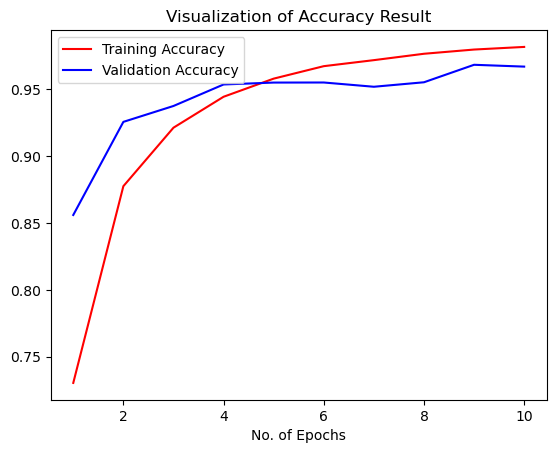

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## some other metrics for model evaluation

In [22]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'tmp\plant_disease_dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 327s 19ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.96      0.98       440
                                   Apple___healthy       0.98      0.93      0.96       502
                               Blueberry___healthy       0.90      1.00      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

## Confusion matrix Visualization

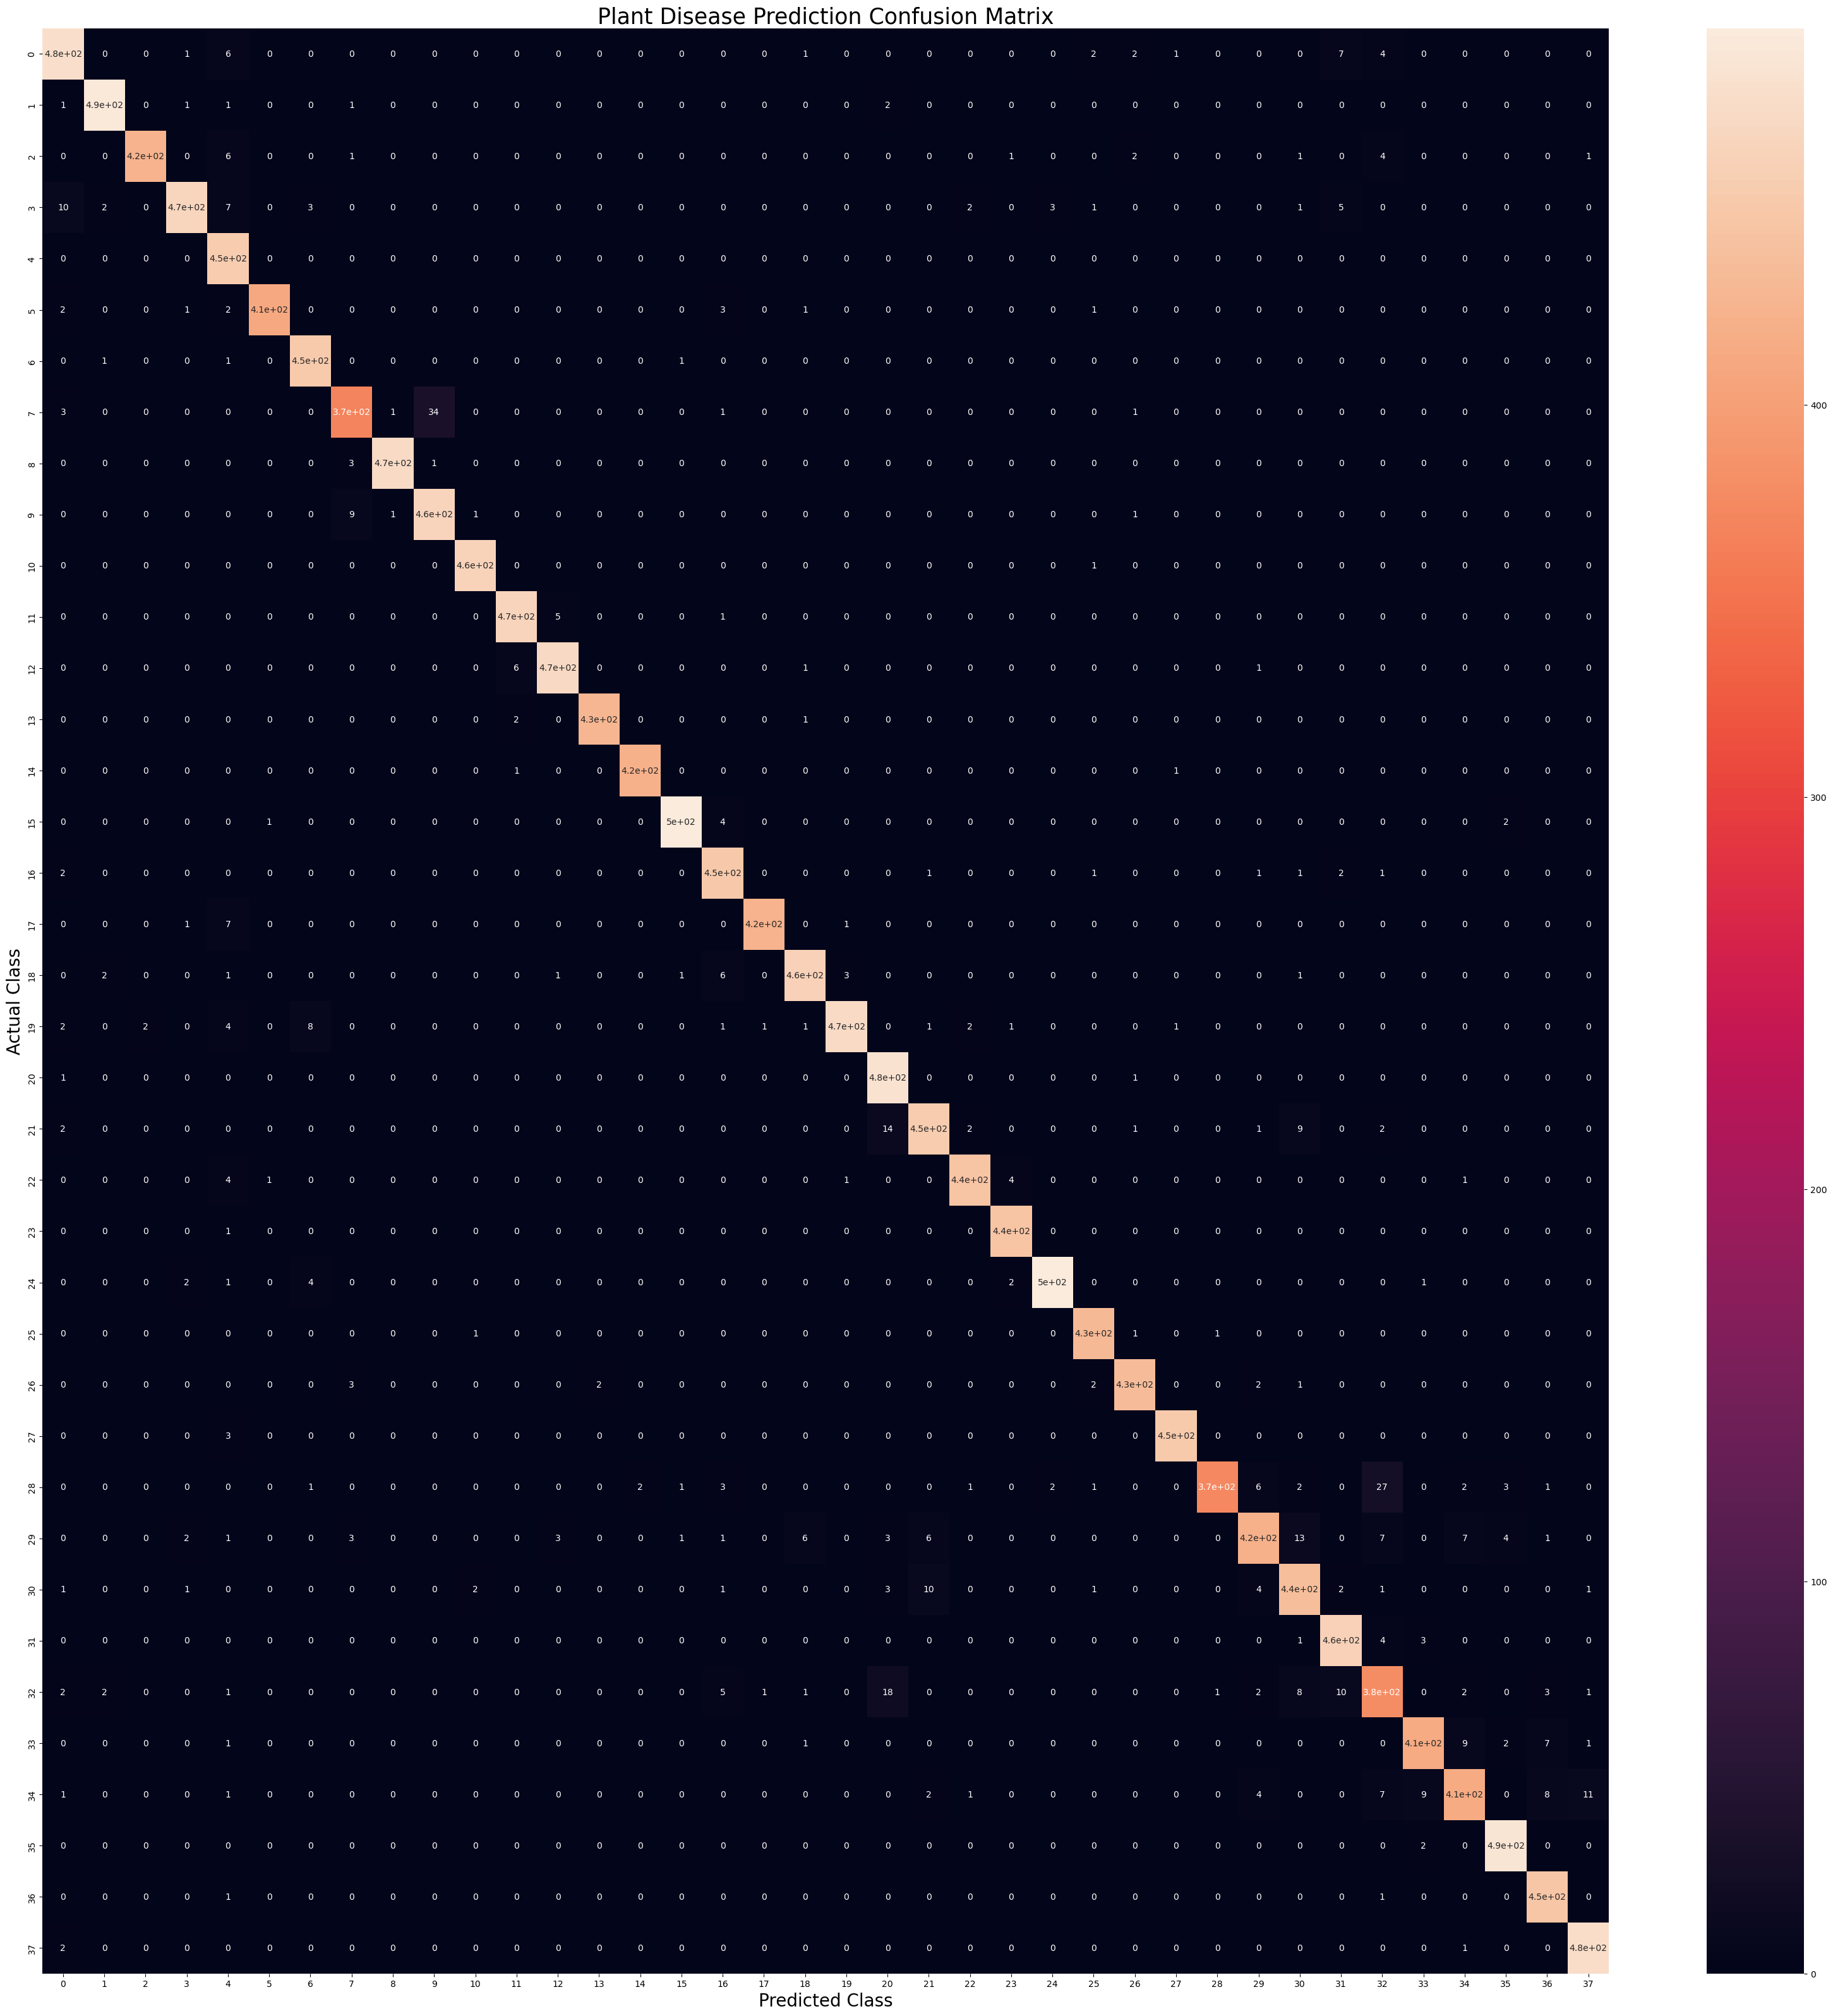

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()